# Sumário <a id='back'></a>

* [1. Introdução](#intro)
* [2. Inicialização](#data_review)
* [3. Carregando dados](#data_preprocessing)
* [4. Pré processamento de dados](#hipóteses)
* [5. Análise exploratória dos dados](#analise)
    * [5.1 Filtrando os dados](#filtrando)
    * [5.2 Estudando a conversão em diferentes etapas do funil](#funil)
    * [5.3  O número de eventos por usuário é distribuído igualmente entre as amostras?](#amostras)
    * [5.4  Como o número de eventos é distribuído entre os dias?](#eventos)
* [6. Avaliando resultados](#resultados)
    * [6.1 Calculando proporções entre grupos para cada etapa do funil (product_page, product_cart, purchase)](#proporções)]
    * [6.2 Testando diferenças estatísticas](#diferenças)
* [7. Conclusão](#conclusão)

## Introdução

Uma loja online internacional iniciou uma tarefa analítica mas não completou: lançaram um teste A/B e desistiram (para começar uma fazenda de melancias no Brasil). Minha tarefa é completá-la.

## Inicialização

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import math
import numpy as np

## Carregando dados

In [2]:
eventos = pd.read_csv("/datasets/ab_project_marketing_events_us.csv")

In [3]:
cadastros = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')

In [4]:
eventos_usuarios = pd.read_csv('/datasets/final_ab_events_upd_us.csv')

In [5]:
participantes = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')

## Pré processamento dos dados

### Eventos

Calendário de eventos de marketing para 2020

- `name` — do nome dos eventos de marketing
- `regions` — das regiões onde a campanha será realizada
- `start_dt` — de data de início da campanha
- `finish_dt` — da data de término da campanha

In [6]:
eventos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [7]:
eventos

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [8]:
eventos.duplicated().sum()

0

São 4 colunas e 14 linhas

- Não possui valores ausentes
- Não possui dados duplicados
- O tipo de dados das colunas `start_dt` e `finish_dt` deveriam ser do tipo datetime.

In [9]:
# Transformando o tipo de dados para datetime
eventos['start_dt'] = pd.to_datetime(eventos['start_dt'])
eventos['finish_dt'] = pd.to_datetime(eventos['finish_dt'])

In [10]:
# Verificando se funcionou
eventos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


### Cadastros

Todos os usuários que se cadastraram na loja online de 7 de dezembro a 21, de 2020

- `user_id`
- `first_date` — da data de cadastro
- `region`
- `device` — do dispositivo usado para o cadastro

In [11]:
cadastros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [12]:
cadastros.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [13]:
cadastros.duplicated().sum()

0

São 4 colunas e 58703 linhas
- Não possui valores ausentes
- Não possui dados duplicados
- O tipo da coluna `first_date` deveria ser do tipo datetime

In [14]:
# Mudando o tipo de dados para datetime
cadastros['first_date'] = pd.to_datetime(cadastros['first_date'])

In [15]:
# Verificando se funcionou
cadastros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


###  Eventos_usuários

Todos os eventos dos novos usuários dentro do período de 7 de dezembro, de 2020 até 1 de janeiro, de 2021

- `user_id`
- `event_dt` — da data e hora do evento
- `event_name` — do nome da fonte do evento
- `details` — dos dados adicionais sobre o evento (por exemplo, o total do pedido em USD para eventos `purchase`)

In [16]:
eventos_usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [17]:
eventos_usuarios.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [18]:
eventos_usuarios.duplicated().sum()

0

São 4 colunas e 423761 linhas
- Não possui dados duplicados
- A coluna `details` possui muitos valores ausentes
- O tipo da coluna `event_dt` deveria ser do tipo datetime

In [19]:
# Lidando com valores ausentes

eventos_usuarios[eventos_usuarios['details'].isna()]['event_name'].value_counts()

login           182465
product_page    120862
product_cart     60120
Name: event_name, dtype: int64

In [20]:
eventos_usuarios['event_name'].value_counts()

login           182465
product_page    120862
purchase         60314
product_cart     60120
Name: event_name, dtype: int64

Os detalhes são nulos para eventos que não são compras, pois eles não tem valor a ser detalhado.

In [21]:
# Mudando tipo de dados

eventos_usuarios['event_dt'] = pd.to_datetime(eventos_usuarios['event_dt'])

In [22]:
# Verificando se funcionou

eventos_usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB


### Participantes

Tabela contendo os participantes do teste

- `user_id`
- `ab_test` — nome do teste
- `group` — o grupo de teste ao qual o usuário pertencia

In [23]:
participantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [24]:
participantes.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [25]:
participantes.duplicated().sum()

0

São 3 colunas e 14525 linhas
- Não possui valores ausentes
- Não possui valores duplicados
- O tipo dos dados estão corretos


In [26]:
# Excluindo possíveis dados que ultrapassem o tempo do teste
eventos_usuarios = eventos_usuarios[eventos_usuarios['event_dt']<pd.to_datetime('01-01-2021', format='%d-%m-%Y')]

## Análise exploratória dos dados

**- Resultado esperado: em até 14 dias após o cadastro, usuários mostram uma conversão melhor nas visualizações de página do produto (o evento `product_page` event), ao adicionar itens ao carrinho (`product_cart`), e compras (`purchase`). A cada etapa do funil `product_page → product_cart → purchase`, terá ao menos 10% de aumento.**

### Filtrando os dados

Precisamos saber a "idade" para fazer a análise acima. Vou salvar a data de cadastro dos usuários.

In [27]:
age = cadastros.pivot_table(index='user_id', values='first_date', aggfunc='min')

In [28]:
age

,first_date
user_id,
0001710F4DDB1D1B,2020-12-14
000199F1887AE5E6,2020-12-14
0002499E372175C7,2020-12-22
0002CE61FF2C4011,2020-12-07
000456437D0EFFE1,2020-12-15
...,...
FFF7A7BAF44FE9B4,2020-12-19
FFF8FDBE2FE99C91,2020-12-20
FFF91B6C5431F375,2020-12-14


In [29]:
start_date = pd.to_datetime('07-12-2020', format='%d-%m-%Y')
end_date = pd.to_datetime('21-12-2020', format='%d-%m-%Y')
users_dt = age[(age['first_date'] > start_date) & (age['first_date'] < end_date)]

In [30]:
users_dt = users_dt.reset_index()

**Juntando as tabelas para a análise**

In [31]:
eventos_usuarios = pd.merge(users_dt, eventos_usuarios, on='user_id', how='left')

In [32]:
eventos_usuarios = pd.merge(cadastros, eventos_usuarios, on='user_id', how='left')

In [33]:
eventos_usuarios = pd.merge(participantes, eventos_usuarios, on='user_id', how='left')

In [34]:
eventos_usuarios

,user_id,group,ab_test,first_date_x,region,device,first_date_y,event_dt,event_name,details
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,NaT,NaT,NaN,NaN
1,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone,2020-12-20,2020-12-20 15:46:06,product_page,NaN
2,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone,2020-12-20,2020-12-21 00:40:59,product_page,NaN
3,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone,2020-12-20,2020-12-20 15:46:02,login,NaN
4,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone,2020-12-20,2020-12-21 00:40:58,login,NaN
...,...,...,...,...,...,...,...,...,...,...
81030,63FBE257B05F2245,A,interface_eu_test,2020-12-20,EU,Android,2020-12-20,2020-12-23 13:03:17,login,NaN
81031,79F9ABFB029CF724,B,interface_eu_test,2020-12-14,EU,PC,2020-12-14,2020-12-14 19:12:49,login,NaN
81032,79F9ABFB029CF724,B,interface_eu_test,2020-12-14,EU,PC,2020-12-14,2020-12-15 01:50:22,login,NaN
81033,79F9ABFB029CF724,B,interface_eu_test,2020-12-14,EU,PC,2020-12-14,2020-12-16 19:27:36,login,NaN


**Excluindo colunas repetidas ou que não serão necessárias**

In [35]:
eventos_usuarios = eventos_usuarios.drop(['first_date_y', 'device'], axis = 1)

In [36]:
eventos_usuarios

,user_id,group,ab_test,first_date_x,region,event_dt,event_name,details
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,NaT,NaN,NaN
1,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,2020-12-20 15:46:06,product_page,NaN
2,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,2020-12-21 00:40:59,product_page,NaN
3,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,2020-12-20 15:46:02,login,NaN
4,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,2020-12-21 00:40:58,login,NaN
...,...,...,...,...,...,...,...,...
81030,63FBE257B05F2245,A,interface_eu_test,2020-12-20,EU,2020-12-23 13:03:17,login,NaN
81031,79F9ABFB029CF724,B,interface_eu_test,2020-12-14,EU,2020-12-14 19:12:49,login,NaN
81032,79F9ABFB029CF724,B,interface_eu_test,2020-12-14,EU,2020-12-15 01:50:22,login,NaN
81033,79F9ABFB029CF724,B,interface_eu_test,2020-12-14,EU,2020-12-16 19:27:36,login,NaN


**Filtrando os dados para ações realizadas em até 14 dias após o cadastro do usuário**

In [37]:
eventos_usuarios = eventos_usuarios[eventos_usuarios['first_date_x'] - eventos_usuarios['event_dt'] <= pd.Timedelta(days=14)] 

**Público: 15% de novos usuários da região da UE**

In [38]:
eventos = eventos.drop(eventos[~eventos['regions'].str.contains('EU')].index)

In [39]:
cadastros= cadastros.drop(cadastros[~cadastros['region'].str.contains('EU')].index)

In [40]:
cadastros['region'].value_counts()

EU    43396
Name: region, dtype: int64

In [41]:
# 58703 é o total de usuários cadastrados antes de excluirmos os que não são da UE

43396/58703 * 100

73.9246716522154

Quase 74% dos usuários cadastrados são da região da UE.

**Número esperado de participantes do teste: 6000**

In [42]:
eventos_usuarios.pivot_table(index=['ab_test', 'group'], values='user_id', aggfunc='nunique')

user_id
ab_test                 group         
interface_eu_test       A         3922
                        B         3837
recommender_system_test A         2167
                        B          653

O número de participantes esperado é de 6000, mas não foi alcançado, isso pode afetar os resultados, eles podem não ser precisos.

**Filtrando os dados para eventos desejados (product_page → product_cart → purchase) / nome do teste: recommender_system_test**

In [43]:
eventos_interesse = ['product_page', 'product_cart', 'purchase']
eventos_usuarios = eventos_usuarios[(eventos_usuarios['event_name'].isin(eventos_interesse))]
eventos_interesse = eventos_usuarios[(eventos_usuarios['event_name'].isin(eventos_interesse)) & (eventos_usuarios['ab_test']=='recommender_system_test')]

**Filtrando as datas**

In [44]:
eventos_usuarios = eventos_usuarios[eventos_usuarios['event_dt'] >= eventos_usuarios.groupby('user_id')['first_date_x'].transform('min')]
eventos_usuarios = eventos_usuarios[eventos_usuarios['event_dt'] <= eventos_usuarios['event_dt'] + pd.Timedelta(days=14)]
eventos_usuarios = eventos_usuarios.dropna(subset=['event_name'])

### Estudando a conversão em diferentes etapas do funil

In [45]:
product_pageB = eventos_interesse[(eventos_interesse['event_name'] == 'product_page')&((eventos_usuarios['group']=='B'))]['user_id'].nunique()
product_cartB = eventos_interesse[(eventos_interesse['event_name'] == 'product_cart')&((eventos_usuarios['group']=='B'))]['user_id'].nunique()
purchaseB = eventos_interesse[(eventos_interesse['event_name'] == 'purchase')&((eventos_usuarios['group']=='B'))]['user_id'].nunique()

/tmp/ipykernel_139/3751294232.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  product_pageB = eventos_interesse[(eventos_interesse['event_name'] == 'product_page')&((eventos_usuarios['group']=='B'))]['user_id'].nunique()
/tmp/ipykernel_139/3751294232.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  product_cartB = eventos_interesse[(eventos_interesse['event_name'] == 'product_cart')&((eventos_usuarios['group']=='B'))]['user_id'].nunique()
/tmp/ipykernel_139/3751294232.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  purchaseB = eventos_interesse[(eventos_interesse['event_name'] == 'purchase')&((eventos_usuarios['group']=='B'))]['user_id'].nunique()


In [46]:
product_pageA = eventos_interesse[(eventos_interesse['event_name'] == 'product_page')&((eventos_usuarios['group']=='A'))]['user_id'].nunique()
product_cartA = eventos_interesse[(eventos_interesse['event_name'] == 'product_cart')&((eventos_usuarios['group']=='A'))]['user_id'].nunique()
purchaseA = eventos_interesse[(eventos_interesse['event_name'] == 'purchase')&((eventos_usuarios['group']=='A'))]['user_id'].nunique()

/tmp/ipykernel_139/590575985.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  product_pageA = eventos_interesse[(eventos_interesse['event_name'] == 'product_page')&((eventos_usuarios['group']=='A'))]['user_id'].nunique()
/tmp/ipykernel_139/590575985.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  product_cartA = eventos_interesse[(eventos_interesse['event_name'] == 'product_cart')&((eventos_usuarios['group']=='A'))]['user_id'].nunique()
/tmp/ipykernel_139/590575985.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  purchaseA = eventos_interesse[(eventos_interesse['event_name'] == 'purchase')&((eventos_usuarios['group']=='A'))]['user_id'].nunique()


**Analisar resultado esperado: 10% de aumento a cada etapa do funil**

Calculando a taxa de conversão 

**Grupo A**

In [47]:
grupoA = eventos_usuarios[eventos_usuarios['group']=='A']['user_id'].nunique()
conversao_product_pageA = product_pageA / grupoA
print(conversao_product_pageA)
conversao_product_cartA = product_cartA / grupoA
print(conversao_product_cartA)
conversao_purchaseA = purchaseA / grupoA
print(conversao_purchaseA)

0.286734693877551
0.1363265306122449
0.14


In [48]:
conversao_product_pageA * 1.1 <= conversao_product_cartA and conversao_product_cartA * 1.1 <= conversao_purchaseA

False

**Grupo B**

In [49]:
grupoB = eventos_usuarios[eventos_usuarios['group']=='B']['user_id'].nunique()
conversao_product_pageB = product_pageB / grupoB
print(conversao_product_pageB)
conversao_product_cartB = product_cartB / grupoB
print(conversao_product_cartB)
conversao_purchaseB = purchaseB / grupoB
print(conversao_purchaseB)

0.0962962962962963
0.050205761316872426
0.04691358024691358


In [50]:
conversao_product_pageB * 1.1 <= conversao_product_cartB and conversao_product_cartB * 1.1 <= conversao_purchaseB

False

**Ambos os grupos**

In [51]:
users_in_both_groups = eventos_usuarios.groupby('user_id')['group'].nunique() == 2
users_AB = eventos_usuarios[eventos_usuarios['user_id'].isin(users_in_both_groups[users_in_both_groups].index)]

In [52]:
eventos_interesseAB = users_AB[users_AB['ab_test']=='recommender_system_test']
n_AB = users_AB['user_id'].count()

In [76]:
product_pageAB = eventos_interesseAB[(eventos_interesseAB['event_name'] == 'product_page')]['user_id'].count()
product_cartAB = eventos_interesseAB[(eventos_interesseAB['event_name'] == 'product_cart')]['user_id'].count()
purchaseAB = eventos_interesseAB[(eventos_interesseAB['event_name'] == 'purchase')]['user_id'].count()

In [77]:
users_in_both_groups = eventos_usuarios.groupby('user_id')['group'].nunique() == 2
users_AB = eventos_usuarios[eventos_usuarios['user_id'].isin(users_in_both_groups[users_in_both_groups].index)]
conversao_product_pageAB = product_pageAB / n_AB
print(conversao_product_pageB)
conversao_product_cartAB = product_cartAB / n_AB
print(conversao_product_cartB)
conversao_purchaseAB = purchaseAB / n_AB
print(conversao_purchaseB)

0.0962962962962963
0.050205761316872426
0.04691358024691358


In [78]:
conversao_product_pageAB * 1.1 <= conversao_product_cartAB and conversao_product_cartAB * 1.1 <= conversao_purchaseAB

False

As taxas de conversão não aumentaram em pelo menos 10% em todas as etapas do funil nem para usuários que estão no grupo A nem para usuários que estão no grupo B, e nem para usuários que estão em ambos os grupos - o resultado esperado não foi alcançado.

### O número de eventos por usuário é distribuído igualmente entre as amostras?

In [56]:
A = eventos_usuarios[eventos_usuarios['group'] == 'A']
B = eventos_usuarios[eventos_usuarios['group'] == 'B']

In [57]:
A.groupby('event_name')['user_id'].nunique()

event_name
product_cart    1888
product_page    3839
purchase        1991
Name: user_id, dtype: int64

In [58]:
B.groupby('event_name')['user_id'].nunique()

event_name
product_cart    1453
product_page    2812
purchase        1407
Name: user_id, dtype: int64

In [59]:
A['user_id'].nunique()

4900

In [60]:
B['user_id'].nunique()

3645

O grupo A possui mais eventos por usuário que o B, o que já era de se esperar pois há mais usuários no grupo A, então é proporcional.

### Como o número de eventos é distribuído entre os dias?

In [61]:
eventos['duracao'] = (eventos['finish_dt'] - eventos['start_dt']).dt.days + 1
eventos['dia'] = eventos['start_dt'].dt.day
eventos['mês'] = eventos['start_dt'].dt.month

In [62]:
eventos.sort_values(['mês', 'dia'])

,name,regions,start_dt,finish_dt,duracao,dia,mês
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16,3,14,2
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10,3,8,3
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19,3,17,3
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19,8,12,4
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03,3,1,5
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01,6,26,11
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03,10,25,12


In [63]:
# Lista referente a novas linhas a serem criadas na função para expandir
rows = []

# Iterando sobre as linhas do DataFrame
for index, row in eventos.iterrows():
    # Extraindo as informações do evento
    name = row['name']
    regions = row['regions']
    start_dt = row['start_dt']
    finish_dt = row['finish_dt']
    duracao = row['duracao']
    dia_evento = row['dia']
    
    # Calculando o número de dias entre o início e o fim do evento
    n_dias = (finish_dt - start_dt).days + 1
    
    # Criando uma nova linha para cada dia do evento
    for i in range(n_dias):
        dia = start_dt + pd.Timedelta(days=i)
        nova_linha = [name, regions, dia, dia, duracao]
        rows.append(nova_linha)

# Criando um novo DataFrame com as linhas adicionais
df_freq_eventos = pd.DataFrame(rows, columns=['name', 'regions', 'start_dt', 'finish_dt', 'duracao'])
print(df_freq_eventos)

                                name                   regions   start_dt  \
0           Christmas&New Year Promo             EU, N.America 2020-12-25   
1           Christmas&New Year Promo             EU, N.America 2020-12-26   
2           Christmas&New Year Promo             EU, N.America 2020-12-27   
3           Christmas&New Year Promo             EU, N.America 2020-12-28   
4           Christmas&New Year Promo             EU, N.America 2020-12-29   
5           Christmas&New Year Promo             EU, N.America 2020-12-30   
6           Christmas&New Year Promo             EU, N.America 2020-12-31   
7           Christmas&New Year Promo             EU, N.America 2021-01-01   
8           Christmas&New Year Promo             EU, N.America 2021-01-02   
9           Christmas&New Year Promo             EU, N.America 2021-01-03   
10      St. Valentine's Day Giveaway  EU, CIS, APAC, N.America 2020-02-14   
11      St. Valentine's Day Giveaway  EU, CIS, APAC, N.America 2020-02-15   

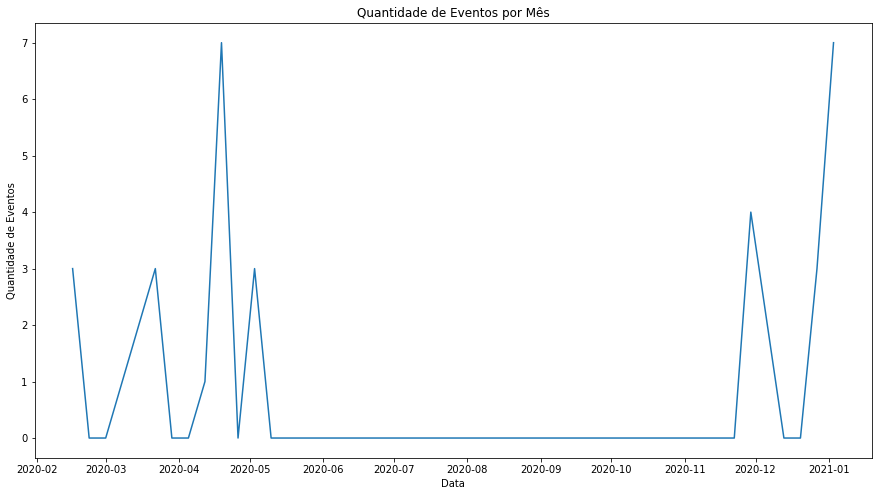

In [64]:
# Convertendo a coluna 'start_dt' para datetime
df_freq_eventos['start_dt'] = pd.to_datetime(df_freq_eventos['start_dt'])
df_freq_eventos.set_index('start_dt', inplace=True)
eventos_por_mes = df_freq_eventos.resample('W').size()

# Plotando o gráfico de linha
plt.figure(figsize=(15, 8))
plt.plot(eventos_por_mes)
plt.xlabel('Data')
plt.ylabel('Quantidade de Eventos')
plt.title('Quantidade de Eventos por Mês')

plt.show()

Os eventos são sempre em datas comemorativas, e tem média de duração de 3 dias; exceto as campanhas de páscoa, Black friday e natal/ ano novo - campanhas de final de ano/ início do ano são mais longas e com certeza são as que mais chamam atenção dos usuários.

## Avaliando resultados

### Calculando proporções entre grupos para cada etapa do funil (product_page, product_cart, purchase)

- Página do produto

In [65]:
eventos_interesse['pg_produto'] = (eventos_interesse['event_name'] == 'product_page').astype(int)

In [66]:
proporcao_produto_grupo_a = eventos_interesse[eventos_interesse['group'] == 'A']['pg_produto'].mean()
proporcao_produto_grupo_b = eventos_interesse[eventos_interesse['group'] == 'B']['pg_produto'].mean()

In [67]:
print(f'Proporção para o grupo A: {proporcao_produto_grupo_a:.2%}')
print(f'Proporção para o grupo B: {proporcao_produto_grupo_b:.2%}')

Proporção para o grupo A: 51.20%
Proporção para o grupo B: 50.29%


- Página do carrinho

In [68]:
eventos_interesse['pg_carrinho'] = (eventos_interesse['event_name'] == 'product_cart').astype(int)

In [69]:
proporcao_carrinho_grupo_a = eventos_interesse[eventos_interesse['group'] == 'A']['pg_carrinho'].mean()
proporcao_carrinho_grupo_b = eventos_interesse[eventos_interesse['group'] == 'B']['pg_carrinho'].mean()

In [70]:
print(f'Proporção para o grupo A: {proporcao_carrinho_grupo_a:.2%}')
print(f'Proporção para o grupo B: {proporcao_carrinho_grupo_b:.2%}')

Proporção para o grupo A: 24.36%
Proporção para o grupo B: 26.14%


- Compra

In [71]:
eventos_interesse['compra'] = (eventos_interesse['event_name'] == 'purchase').astype(int)

In [72]:
proporcao_compra_grupo_a = eventos_interesse[eventos_interesse['group'] == 'A']['compra'].mean()
proporcao_compra_grupo_b = eventos_interesse[eventos_interesse['group'] == 'B']['compra'].mean()

In [73]:
print(f'Proporção para o grupo A: {proporcao_compra_grupo_a:.2%}')
print(f'Proporção para o grupo B: {proporcao_compra_grupo_b:.2%}')

Proporção para o grupo A: 24.44%
Proporção para o grupo B: 23.57%


### Testando diferenças estatísticas

In [74]:
def conversions_z_test(sample_A, sample_B, alpha):

    event_list = []
    sample_a_conv_list = []
    sample_b_conv_list = []
    conv_diff_list = []
    reject_null_list = []
    events = eventos_interesse['event_name'].unique()

    for event in events:
        # calcular o total de usuários únicos para ambas as amostras
        total_users_A = sample_A['user_id'].nunique()
        total_users_B = sample_B['user_id'].nunique()

        # calcule usuários únicos por cada evento para ambas as amostras
        users_per_event_A = sample_A.groupby('event_name')['user_id'].nunique().sort_values(ascending=False)
        users_per_event_B = sample_B.groupby('event_name')['user_id'].nunique().sort_values(ascending=False)

        # calcular a porcentagem de usuários que acionaram cada evento para ambas as amostras
        percent_users_events_A = users_per_event_A / total_users_A
        percent_users_events_B = users_per_event_B / total_users_B

        # executar z-test
        p1 = percent_users_events_A[event]
        p2 = percent_users_events_B[event] 
        p = (users_per_event_A[event] + users_per_event_B[event]) / (total_users_A + total_users_B)
     # calcular z para amostras
        z = ((p1 - p2) - 0) / (math.sqrt((p*(1-p))*((1/total_users_A)+(1/total_users_B))))

        # obter pontuação z de alfa
        z_score = st.norm.ppf(1 - alpha)

        # obter resultados
        if z >= z_score:
            reject_null = False
        else:
            reject_null = True

        # anexar dados e resultados a listas
        event_list.append(event)
        sample_a_conv_list.append((percent_users_events_A[event]*100).round(2))
        sample_b_conv_list.append((percent_users_events_B[event]*100).round(2))
        conv_diff_list = np.array(sample_a_conv_list) - np.array(sample_b_conv_list)
        reject_null_list.append(reject_null)

        # criar dicionário de resultados para DataFrame
        result_dict = {'event': event_list,
                   'sample_a_conv': sample_a_conv_list,
                   'sample_b_conv': sample_b_conv_list,
                   'difference': conv_diff_list,
                   'reject_null': reject_null_list
                  }

    # print hypotheses    
    print(f'Hipótese nula:\n     A diferença nas taxas de conversão entre amostras é estatisticamente significativa')
    print(f'Hipótese alternativa:\n     A diferença nas taxas de conversão entre amostras não é estatisticamente significativa\n')
    print('alpha =', alpha)

    # return results DataFrame
    return pd.DataFrame(result_dict)

In [75]:
alpha = 0.05
conversions_z_test(A, B, alpha)

Hipótese nula:
     A diferença nas taxas de conversão entre amostras é estatisticamente significativa
Hipótese alternativa:
     A diferença nas taxas de conversão entre amostras não é estatisticamente significativa

alpha = 0.05


,event,sample_a_conv,sample_b_conv,difference,reject_null
0,product_page,78.35,77.15,1.20,True
1,purchase,40.63,38.60,2.03,False
2,product_cart,38.53,39.86,-1.33,True


De acordo com o teste, para os eventos `product_page` e `product_cart` nós rejeitamos a hipótese nula, a diferença entre as amostras não é estatisticamente significativa; já para o evento `purchase`, nós não rejeitamos a hipótese nula, a diferença entre as amostras é estatisticamente significativa.

## Conclusão

Iniciei importando a biblioteca e carregando os dados: as tabelas eventos, cadastros, eventos_usuarios e participantes.

Em seguida o pré processamento dos dados, onde:

**Tabela eventos**
- Transformei o tipo de dados das colunas `start_dt` e `finish_dt` para datetime.

**Tabela cadastros**
- Transformei o tipo de dados da coluna `first_date` para datetime.

**Tabela eventos_usuarios**
- Transformei o tipo de dados da coluna `event_dt` para datetime.
- Analisei os dados ausentes e descobri que os detalhes são nulos para eventos que não são compras, pois eles não tem valor a ser detalhado.

**Tabela participantes**
- Estava correta.

Para a tabela eventos_usuarios, exclui possíveis dados que ultrapassem o tempo do teste.

Na análise explorarória:

- Na filtragem dos dados:
    - Uni as tabelas com merge().
    - Exclui colunas repetidas ou que não eram necessárias.
    - Filtrei os dados para ações realizadas em até 14 dias após o cadastro do usuário.
    - Filtrei usuários da região da UE.
    - Vimos que o número esperado de participantes não foi atingido, o que pode afetar o desempenho de um teste A/B, se a amostra não for representativa, os resultados podem não ser confiáveis nem precisos.
    - Filtrei os dados para eventos desejados (product_page → product_cart → purchase).
    - Filtrei as datas.
    
- Estudando a a conversão em diferentes etapas do funil:
    - Vimos que o resultado esperado (a cada etapa do funil product_page → product_cart → purchase, terá ao menos 10% de aumento), não foi atingido para nenhum dos grupos e nem para usuários presentes em ambos os grupos.
    
- O número de eventos por usuário é distribuído igualmente entre as amostras?
    - O numero de eventos no grupo A e B são proporcionais, visto que o grupo A possui mais usuários que o grupo B.

- Como o número de eventos é distribuído entre os dias?    
    - Os eventos são sempre em datas comemorativas, e tem média de duração de 3 dias; exceto as campanhas de páscoa, Black friday e natal/ ano novo - campanhas de final/início de ano são mais longas e com certeza são as que mais chamam atenção dos usuários.
    
Veja se foi realizado corretamente, e analise os resultados -> o teste não foi realizado corretamente, o número de participantes não foi o esperado, o que possibilita resultados não confiáveis e imprecisos; e o resultado também não atingiu o esperado, não atingiu ao menos 10% de aumento a cada etapa do funil.

- Calculando proporções entre grupos para cada etapa do funil:
    - A proporção de um grupo para outro na página de produto varia menos que 1%, não há diferença estatística.
    - A proporção de um grupo para outro na página do carrinho também é pequena, não há diferença estatística.
    - A proporção de um grupo para outro na compra também é menor que 1%, não há diferença estatística.
    
    
- Teste Z:
    - De acordo com o teste, para os eventos product_page e product_cart nós rejeitamos a hipótese nula, a diferença entre as amostras não é estatisticamente significativa; já para o evento purchase, nós não rejeitamos a hipótese nula, a diferença entre as amostras é estatisticamente significativa.
    
-> O número de participantes não foi o esperado, o que possibilita resultados não confiáveis e imprecisos; e o resultado também não foi o esperado, não atingiu pelo menos 10% de aumento a cada etapa do funil.